![시본](images/seaborn.png)

### Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지이다. 
### 기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존한다. 

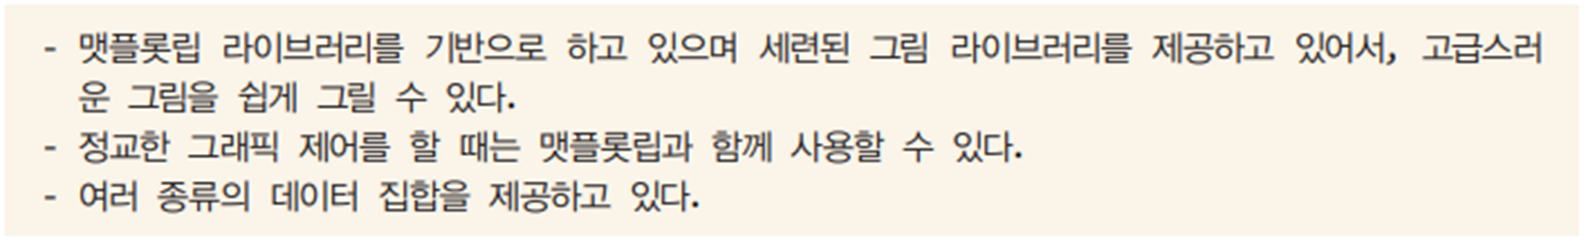

## 왜 만들어졌나?
### 데이터를 탐색하고 이해하는 과정에서 visualization이 핵심 역할을 하게끔 하려고
## 특징
- 여러 변수 간의 관계를 탐색하는 데에 좋다.
- 특히 범주형 변수를 이용해 분포를 살펴보거나 집계하는 작업을 잘 지원한다.
- 데이터의 subset 간에 단일 변수 또는 2개 변수의 분포를 서로 비교하기 쉽다.
- 빌트인된 테마를 이용해 matplotlib의 스타일링 요소들을 간단히 컨트롤할 수 있다.
- 분석하고자 하는 내용에 따라 크게 relplot()(relation), catplot()(category)를 제공한다.

## 주요 argument
- hue, style
  - 범주형 변수를 3번째 축으로 이용해 subset별로 살펴볼 때 효과적
  - 각각 컬러/도형으로 반영
- ci
  - relplot()은 신뢰구간(confidence interval)을 함께 보여줌
  - 데이터셋이 커서 계산 시간이 길어지면 ci=None으로 비활성화

In [ ]:
# 예제 4-25
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# titanic 데이터셋 살펴보기
print(titanic.head())
print('\n')
print(titanic.info())

In [ ]:
# 예제 4-26
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
 
# 그래프 그리기 - 선형회귀선 표시(fit_reg=True)
sns.regplot(x='age',        #x축 변수
            y='fare',       #y축 변수
            data=titanic,   #데이터
            ax=ax1)         #axe 객체 - 1번째 그래프 

# 그래프 그리기 - 선형회귀선 미표시(fit_reg=False)
sns.regplot(x='age',        #x축 변수
            y='fare',       #y축 변수
            data=titanic,   #데이터
            ax=ax2,         #axe 객체 - 2번째 그래프        
            fit_reg=False)  #회귀선 미표시

plt.show()

In [ ]:
# 예제 4-27
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# 기본값
sns.distplot(titanic['fare'], ax=ax1) 

# hist=False
sns.distplot(titanic['fare'], hist=False, ax=ax2) 

# kde=False
sns.distplot(titanic['fare'], kde=False, ax=ax3)        

# 차트 제목 표시
ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

In [ ]:
# 예제 4-28
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,                  # 데이터프레임
            annot=True, fmt='d',    # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=False)             # 컬러 바 표시 여부

plt.show()

In [ ]:
# 예제 4-29
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
 
# 이산형 변수의 분포 - 데이터 분산 미고려
sns.stripplot(x="class",      #x축 변수
              y="age",        #y축 변수           
              data=titanic,   #데이터셋 - 데이터프레임
              ax=ax1)         #axe 객체 - 1번째 그래프 

# 이산형 변수의 분포 - 데이터 분산 고려 (중복 X) 
sns.swarmplot(x="class",      #x축 변수
              y="age",        #y축 변수
              data=titanic,   #데이터셋 - 데이터프레임
              ax=ax2)         #axe 객체 - 2번째 그래프        

# 차트 제목 표시
ax1.set_title('Strip Plot')
ax2.set_title('Strip Plot')

plt.show()

In [ ]:
# 예제 4-30
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# x축, y축에 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1) 

# x축, y축에 변수 할당하고 hue 옵션 추가 
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2) 

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)       

# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

In [ ]:
# 예제 4-31
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# 기본값
sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1) 

# hue 옵션에 'who' 추가 
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax=ax2) 

# dodge=False 옵션 추가 (축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3)       

# 차트 제목 표시
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

In [ ]:
# 예제 4-32
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 4개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 10))   
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
 
# 박스 그래프 - 기본값
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1) 

# 바이올린 그래프 - hue 변수 추가
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2) 

# 박스 그래프 - 기본값
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3) 

# 바이올린 그래프 - hue 변수 추가
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4) 

plt.show()

In [ ]:
# 예제 4-33
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x='fare', y='age', data=titanic) 

# 조인트 그래프 - 회귀선이 그려진 산점도
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic) 

# 조인트 그래프 - 육각 그래프
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic) 

# 조인트 그래프 - 커럴 밀집 그래프
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic) 

# 차트 제목 표시
j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()


In [ ]:
# 예제 4-34
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 조건에 따라 그리드 나누기
g = sns.FacetGrid(data=titanic, col='who', row='survived') 

# 그래프 적용하기
g = g.map(plt.hist, 'age')


In [ ]:
# 예제 4-35
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# titanic 데이터셋 중에서 분석 데이터 선택하기
titanic_pair = titanic[['age','pclass', 'fare']]

# 조건에 따라 그리드 나누기
g = sns.pairplot(titanic_pair)


In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
np.random.seed(1)   

In [ ]:
x = np.arange(0, 10) 
y1 = x 
print(x)
print(y1)
np.corrcoef(x, y1)

In [ ]:
x = np.arange(0, 10) 
y2 = x ** 3    
print(x)
print(y2)
np.corrcoef(x, y2)

In [ ]:
x = np.arange(0, 10)                     
y3 = np.random.randint(0, 100, size=10)  
print(x)
print(y3)
np.corrcoef(x, y3)

In [ ]:
result = np.corrcoef((x, y1, y2, y3))
print(result)

In [ ]:
sns.heatmap(result, annot=True, cmap='Reds')

In [ ]:
df = pd.DataFrame( {'x': x, 'y1' : y1,  'y2': y2,'y3': y3})


In [ ]:
print('x =', x)
print('y1 =', y1)
print('y2 =', y2)
print('y3 =', y3)

In [ ]:
sns.pairplot(df)
plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [2]:
sns.color_palette('copper', 10)

[(0.11141865890495223, 0.07046117647058824, 0.04487254901960784),
 (0.22283731780990446, 0.14092235294117647, 0.08974509803921568),
 (0.3342559767148567, 0.2113835294117647, 0.1346176470588235),
 (0.45051892513741554, 0.28490823529411763, 0.18144117647058822),
 (0.5619375840423678, 0.3553694117647059, 0.22631372549019607),
 (0.67335624294732, 0.42583058823529407, 0.27118627450980387),
 (0.7847749018522723, 0.4962917647058823, 0.3160588235294117),
 (0.9010378502748311, 0.5698164705882353, 0.36288235294117643),
 (1.0, 0.6402776470588235, 0.4077549019607843),
 (1.0, 0.7107388235294118, 0.45262745098039214)]

In [3]:
sns.color_palette('hls', 10)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.6832, 0.33999999999999997),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.41279999999999994, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.5167999999999995, 0.86),
 (0.4752000000000003, 0.33999999999999997, 0.86),
 (0.7871999999999999, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6207999999999999)]

In [ ]:
sns.color_palette('Pastel1', 10)

In [ ]:
sns.color_palette('PRGn', 15)

In [ ]:
cp = sns.color_palette('coolwarm', 16)
print(type(cp))
cp

<AxesSubplot:>

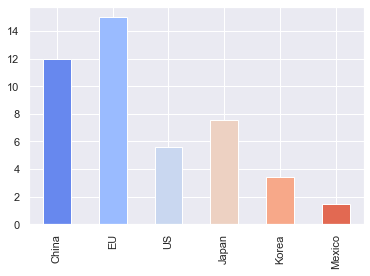

In [5]:
file = 'data/vehicle_prod.csv' 
df = pd.read_csv(file, index_col = 0)
df['2009'].plot(kind='bar', color=sns.color_palette('coolwarm', 6))

In [6]:
from matplotlib import font_manager, rc
font_path = "font/MaplestoryBold.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
print(font_name)
rc('font', family=font_name)

Maplestory


In [7]:
#데이터 준비 
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")   # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터


# 연속형 변수 x 연속형 변수
## **relplot()**

- 지원하는 plot의 종류 : scatter plot과 line plot
- scatter plot : 디폴트로 되어 있음
- line plot : kind='line'

## **Linear regression**

### **regplot()** 
- scatter plot과 회귀선, 신뢰구간을 함께 그려줌
- hue, col, row를 지원하지 않음
- 회귀선만 그리고 싶다면 scatter=None으로 설정

### **lmplot()**
- regplot()과 FacetGrid를 결합한 것
- hue, col, row를 지원함

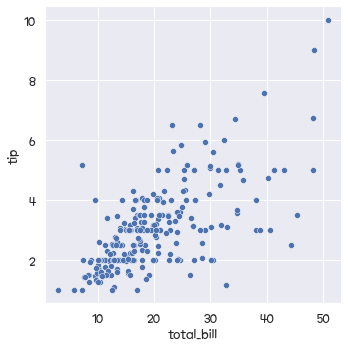

In [8]:
sns.relplot(x="total_bill", y="tip", data=tips)

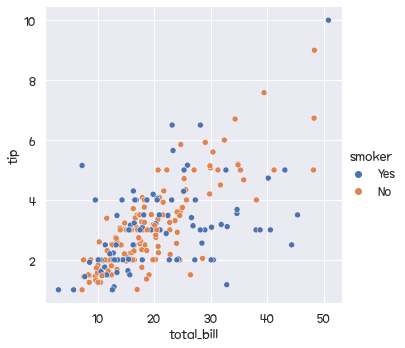

In [9]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

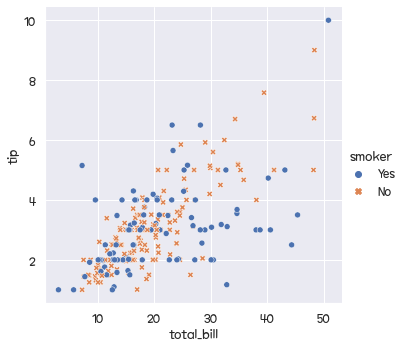

In [10]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips)

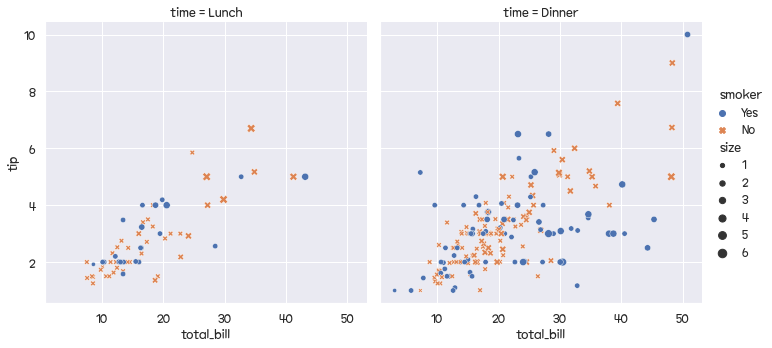

In [11]:
sns.relplot(data=tips, x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size")

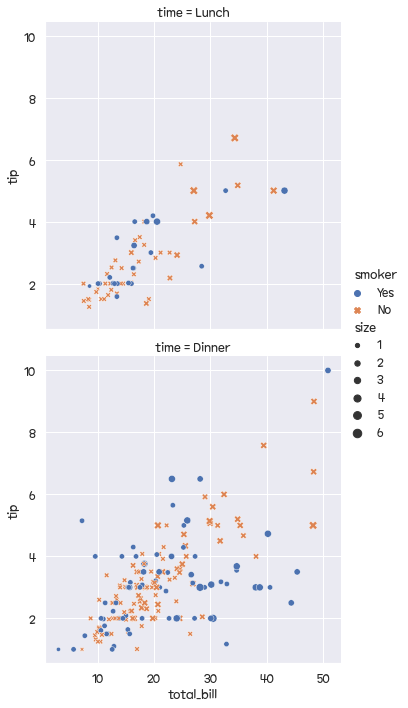

In [12]:
sns.relplot(data=tips, x="total_bill", y="tip", row="time",
            hue="smoker", style="smoker", size="size")

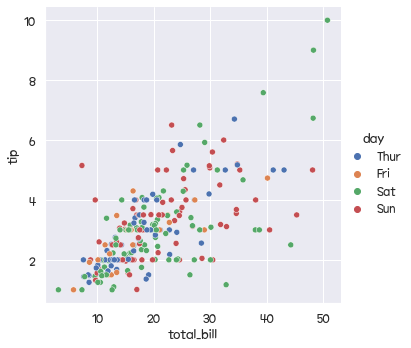

In [13]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day")
plt.show()

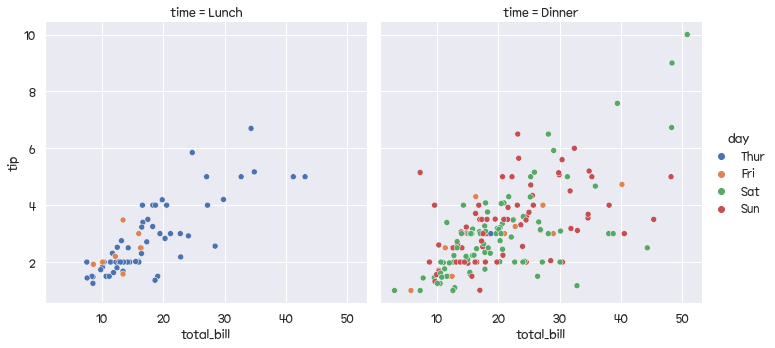

In [14]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time")
plt.show()

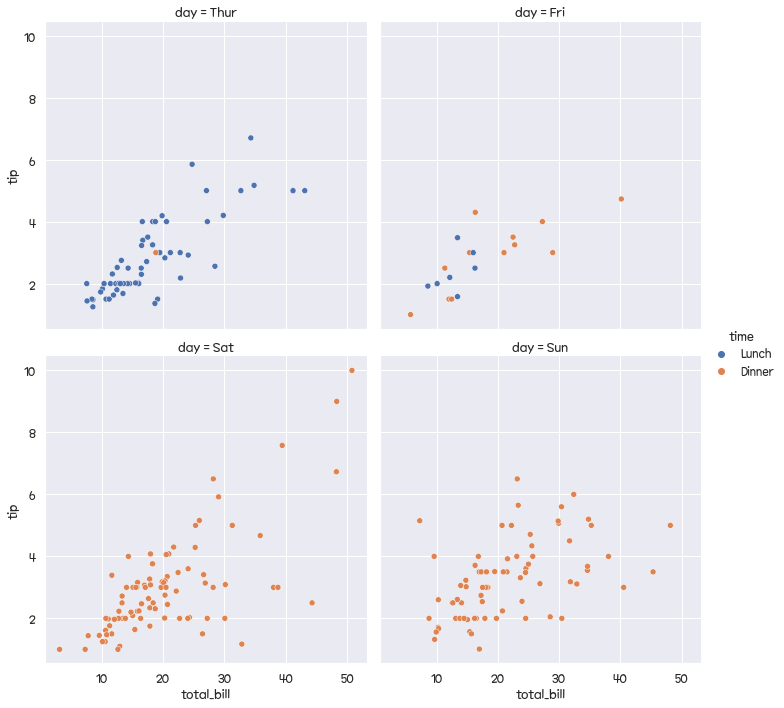

In [15]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="time", col="day", col_wrap=2)
plt.show()

Text(0.5, 1.0, 'Total Bill and Tip')

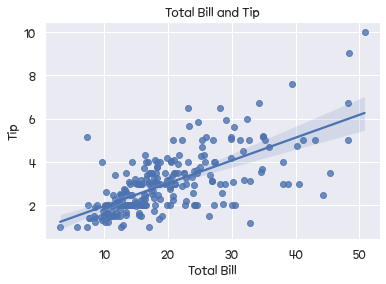

In [16]:
ax = sns.regplot(data=tips, x='total_bill', y='tip')
ax.set_xlabel('Total Bill')  # x 축의 레이블
ax.set_ylabel('Tip')         # y 축의 레이블
ax.set_title('Total Bill and Tip')   # 그림의 제목

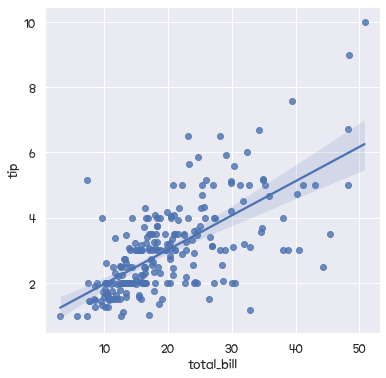

In [17]:
plt.figure(figsize=(6,6))
tips = sns.load_dataset("tips")
sns.regplot(x="total_bill", y="tip", data=tips)
plt.show()

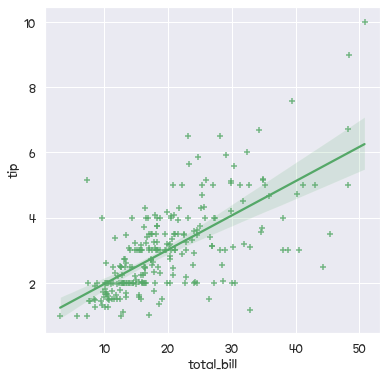

In [18]:
plt.figure(figsize=(6,6))
sns.regplot(x="total_bill", y="tip", data=tips, marker="+", color="g")
plt.show()

<Figure size 432x432 with 0 Axes>

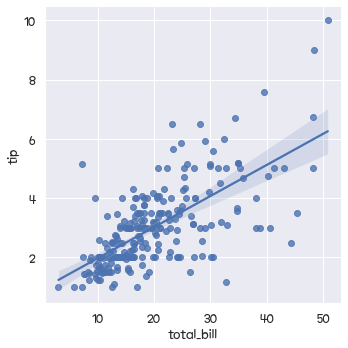

In [19]:
plt.figure(figsize=(6,6))
sns.lmplot(x="total_bill", y="tip", data=tips)
plt.show()

<Figure size 432x432 with 0 Axes>

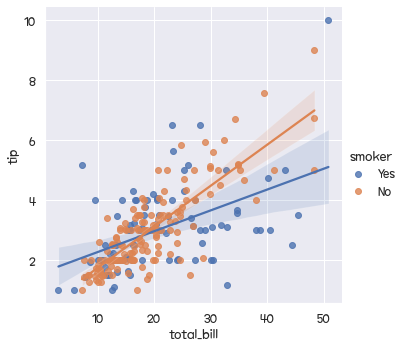

In [20]:
plt.figure(figsize=(6,6))
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)
plt.show()

<Figure size 432x432 with 0 Axes>

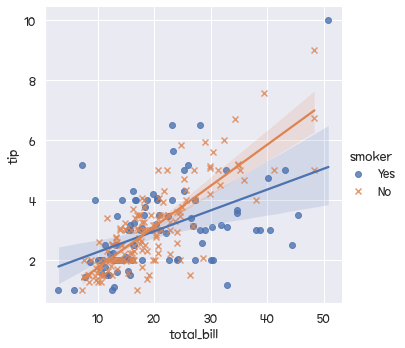

In [21]:
plt.figure(figsize=(6,6))
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, markers=["o", "x"])
plt.show()

<Figure size 432x432 with 0 Axes>

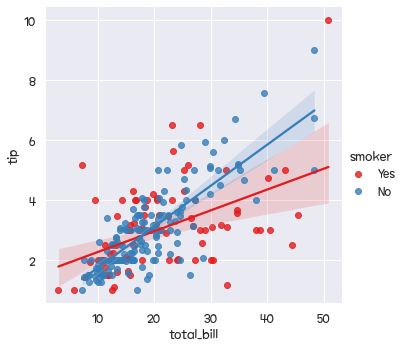

In [22]:
plt.figure(figsize=(6,6))
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, palette="Set1")
plt.show()

<Figure size 432x432 with 0 Axes>

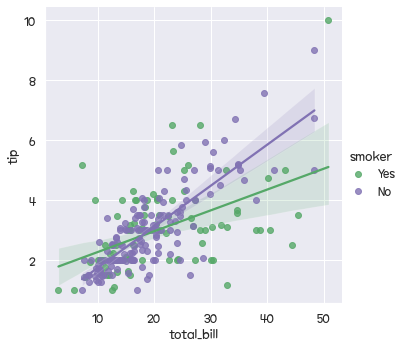

In [23]:
plt.figure(figsize=(6,6))
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, palette=dict(Yes="g", No="m"))
plt.show()

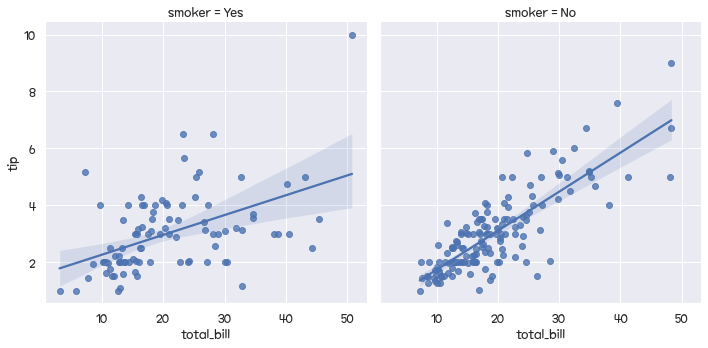

In [24]:
sns.lmplot(x="total_bill", y="tip", col="smoker", data=tips)
plt.show()

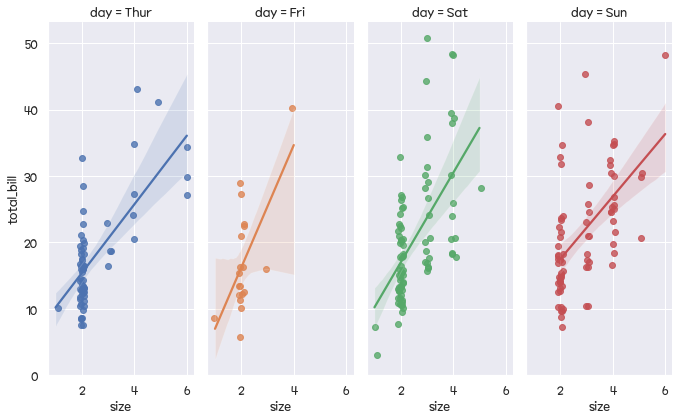

In [25]:
sns.lmplot(x="size", y="total_bill", hue="day", col="day",
               data=tips, height=6, aspect=.4, x_jitter=.1)
plt.show()

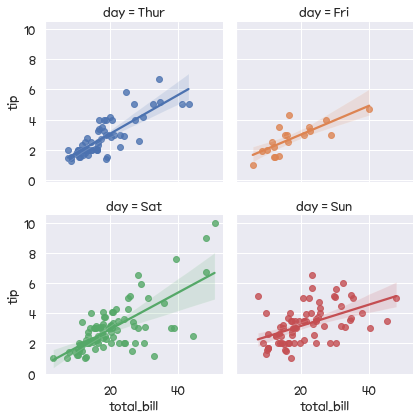

In [26]:
sns.lmplot(x="total_bill", y="tip", col="day", hue="day", data=tips, col_wrap=2, height=3)
plt.show()

### 변수들 사이의 관계 알아보기 - 페어플롯(쌍그래프)

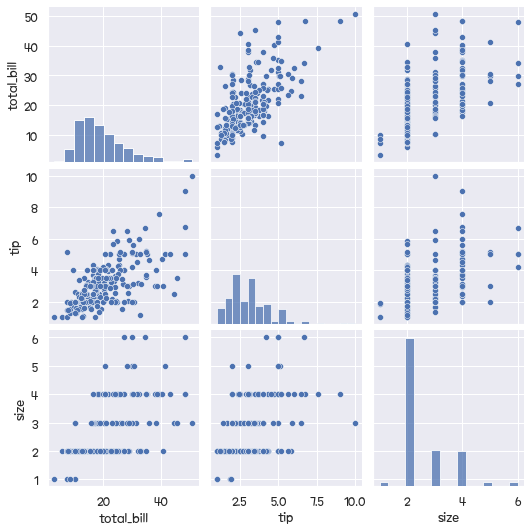

In [27]:
sns.pairplot(tips)

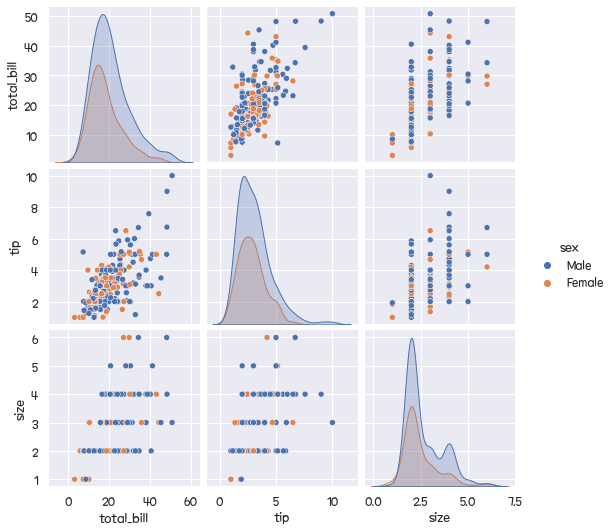

In [28]:
sns.pairplot(tips, hue="sex")
plt.show()

In [29]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 히스토그램

In [ ]:
sns.histplot(data=titanic, x='age')

In [ ]:
sns.histplot(data=titanic, x='age', bins=10)

In [ ]:
sns.histplot(data=titanic, x='age', hue='alive')

In [ ]:
sns.histplot(data=titanic, x='age', hue='alive', multiple='stack')

### 커널밀도추정 그래프

In [ ]:
sns.kdeplot(data=titanic, x='age')

In [ ]:
sns.kdeplot(data=titanic, x='age', hue='alive', multiple='stack')

### 분포도

In [ ]:
sns.displot(data=titanic, x='age')

In [ ]:
sns.displot(data=titanic, x='age', kind='kde')

In [ ]:
sns.displot(data=titanic, x='age', kde=True)

# **범주형 변수 x 연속형 변수**
## 범주형 변수를 기준으로 category별 subset 간의 경향을 비교하려면 catplot()을 사용한다. 

## **scatter plot**

- stripplot() (kind=”strip”, 디폴트)
- swarmplot() (kind=”swarm”)

## **분산을 볼 수 있는 plot**

- boxplot() (kind=”box”)
- violinplot() (kind=”violin”)

## **Estimate plot**

- barplot() (with kind=”bar”)
- countplot() (with kind=”count”)

<AxesSubplot:xlabel='class', ylabel='fare'>

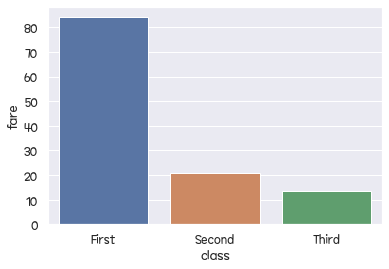

In [30]:
sns.barplot(x='class', y='fare', data=titanic, ci=None)

### 박스플롯(boxplot)

<AxesSubplot:xlabel='class', ylabel='age'>

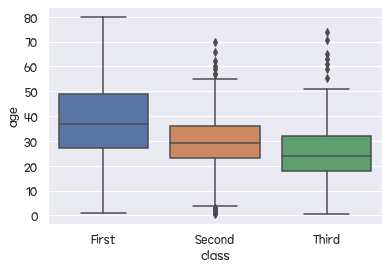

In [31]:
sns.boxplot(x='class', y='age', data=titanic)

### 바이올린플롯(violinplot)

<AxesSubplot:xlabel='class', ylabel='age'>

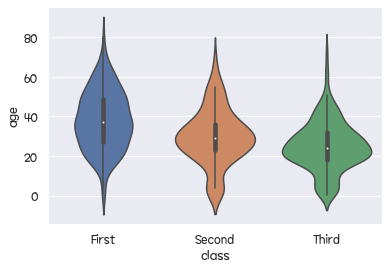

In [32]:
sns.violinplot(x='class', y='age', data=titanic)

In [ ]:
sns.violinplot(x='class', y='age', hue='sex', data=titanic, split=True)

### 카운트플롯(countplot)

<AxesSubplot:xlabel='class', ylabel='count'>

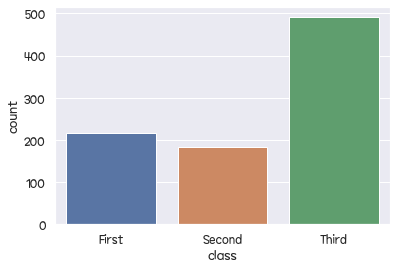

In [33]:
sns.countplot(x='class', data=titanic)

<AxesSubplot:xlabel='count', ylabel='class'>

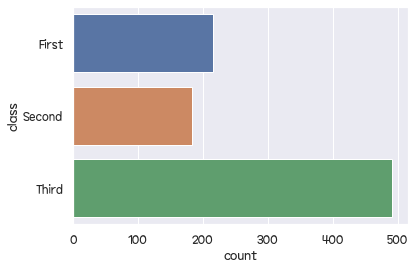

In [34]:
sns.countplot(y='class', data=titanic)

#### 막대그래프

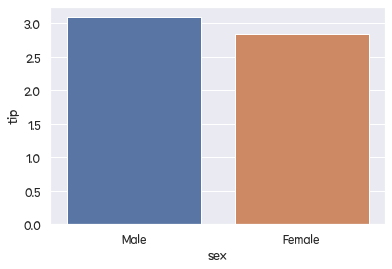

In [35]:
sns.barplot(x="sex",y="tip", data=tips, ci=None)
plt.show()

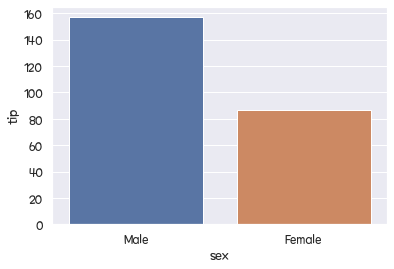

In [36]:
sns.barplot(x="sex", y="tip", estimator=len, data= tips)
plt.show()

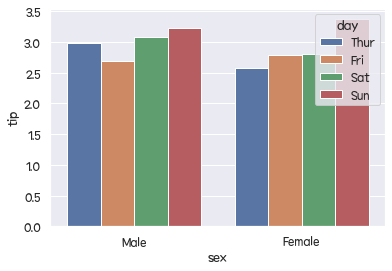

In [37]:
#여러 열에서 집단 묶어서 세부 집단 시각화 하기 
# hue 파라미터 추가
sns.barplot(x= "sex",y= "tip",hue="day", data= tips, ci=None)
plt.show()

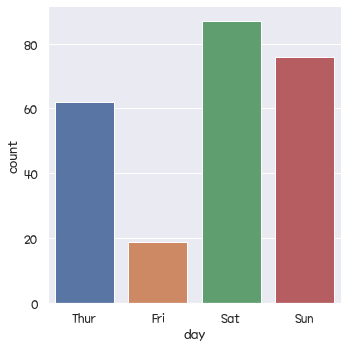

In [38]:
# 요일별 팁 카운트
sns.catplot(x='day', kind='count', data=tips) # 'day' 를 x='day' 라고 설정해야 경고 오류가 발생하지 않음
plt.show()

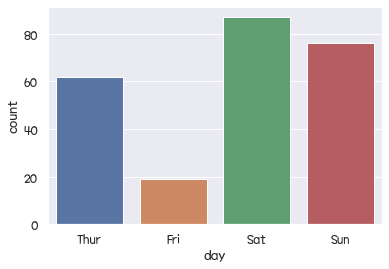

In [39]:
# 요일별 팁 카운트
sns.countplot(x='day', data=tips) 
plt.show()

#### 박스플롯

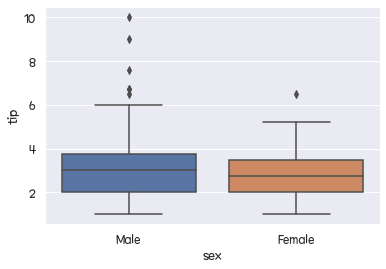

In [40]:
sns.boxplot(x= "sex",y= "tip",data= tips)
plt.show()

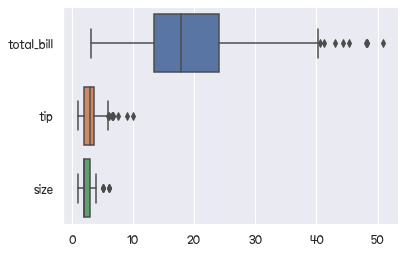

In [41]:
sns.boxplot(data= tips, orient="h")
plt.show()

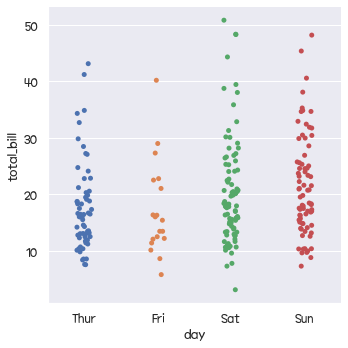

In [42]:
#범주형/연속형
sns.catplot(x="day", y="total_bill", data=tips)
plt.show()

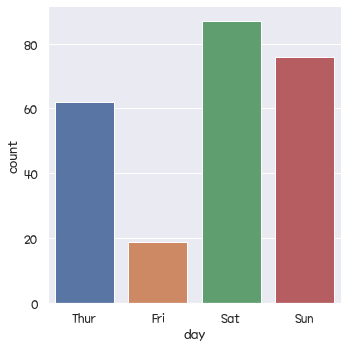

In [43]:
# 요일별 팁 카운트
sns.catplot(x='day', kind='count', data=tips) # 'day' 를 x='day' 라고 설정해야 경고 오류가 발생하지 않음
plt.show()

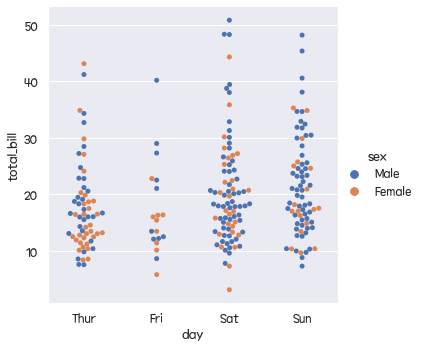

In [44]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)
plt.show()

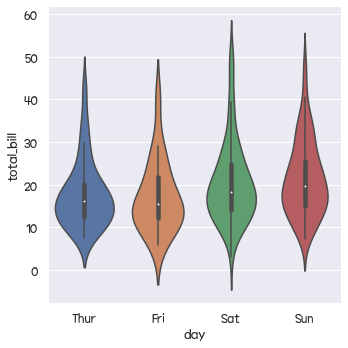

In [45]:
sns.catplot(x="day", y="total_bill", kind="violin", data=tips)
plt.show()

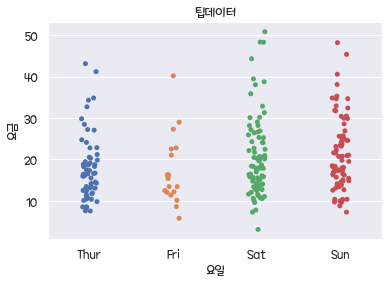

In [46]:
# 시각화
sns.stripplot(x="day", y="total_bill", data=tips)
# 꾸미기
plt.title('팁데이터')
plt.ylabel("요금")
plt.xlabel("요일")
plt.show()

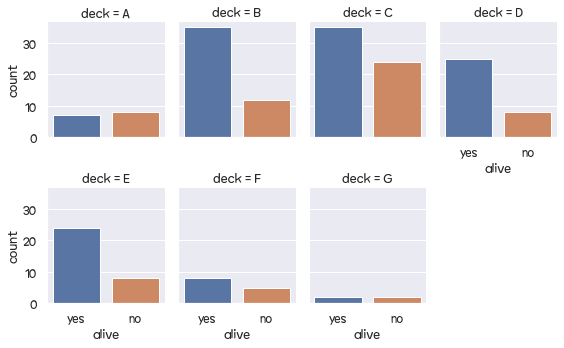

In [47]:
titanic = sns.load_dataset("titanic")
g = sns.catplot(x="alive", col="deck", col_wrap=4,
                data=titanic[titanic.deck.notnull()],
                kind="count", height=2.5, aspect=.8)
plt.show()

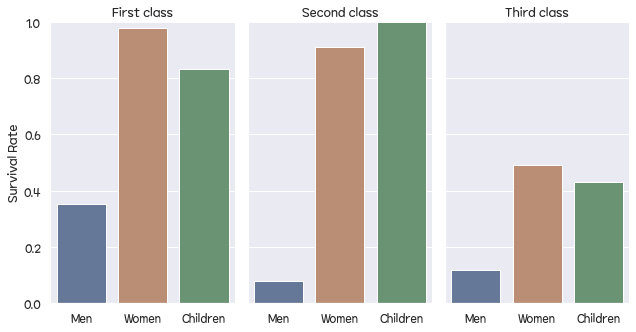

In [48]:
g = sns.catplot(x="who", y="survived", col="class",
                data=titanic, saturation=.5,
                kind="bar", ci=None, aspect=.6)
g.set_axis_labels("", "Survival Rate").set_xticklabels(["Men", "Women", "Children"]).set_titles("{col_name} {col_var}").set(ylim=(0, 1))
plt.show()

## 가독성과 심미성을 위해 relplot(), catplot()에 kind argument를 사용하는 게 더 좋은 방법

In [ ]:
sns.violinplot(x='day',y='total_bill', hue='time', data=tips)
plt.show()

In [ ]:
sns.catplot(x='day',y='total_bill', hue='time', kind='violin', data=tips)
plt.show()

## 피봇테이블 시각화

In [50]:
fw = sns.load_dataset("flights")
fw

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


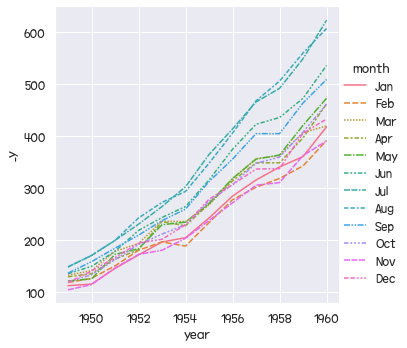

In [51]:
pt1 = pd.pivot_table(data=fw, index="year", columns="month", values="passengers")
display(pt1)
sns.relplot(data=pt1, kind="line")
plt.show()

In [52]:
pt2 = pd.pivot_table(data=fw, index='month', columns='year', values='passengers')
pt2

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

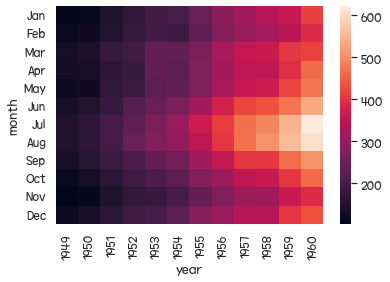

In [53]:
sns.heatmap(data=pt2)

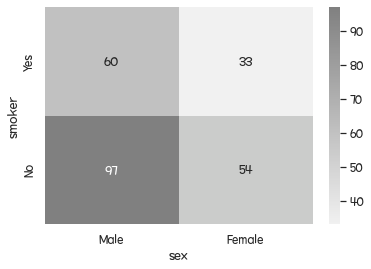

In [49]:
tips_var= tips.pivot_table(index="smoker", columns="sex", aggfunc="size")
tips_var
sns.heatmap(tips_var, cmap=sns.light_palette("gray", as_cmap=True), annot=True, fmt="d")
plt.show()

In [ ]:
sns.lineplot(x='year', y='passengers', data=flights, ci=None)

In [ ]:
sns.lineplot(x='year', y='passengers', data=flights)